<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Engenharia de Software

## Checkpoint 1 - Análise de dados de filmes (MOVIES) ou séries

## Integrantes do grupo:

### Kaiky Alvaro de Miranda RM:98118

### Lucas Rodrigues da Silva RM:98344

### Juan Pinheiro de França RM:552202

# Análise de Performance de Filmes Dirigidos por Diretores Renomados

## Descrição

Este projeto visa analisar a performance de filmes dirigidos por diretores renomados usando um conjunto de dados do Rotten Tomatoes. A análise inclui a exploração de diversas questões de pesquisa avançadas sobre críticas, bilheteira, popularidade, e outros aspectos da performance de filmes.

## Dataset

O arquivo utilizado para esta análise é o `rotten_tomatoes_movies`. Você pode acessar o dataset [aqui](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/data).

### Colunas Relevantes
- `movie_title`: Título do filme
- `directors`: Diretores do filme
- `genres`: Gêneros do filme
- `original_release_date`: Data de lançamento original
- `tomatometer_rating`: Avaliação da crítica (Rotten Tomatoes)
- `audience_rating`: Avaliação do público
- `tomatometer_count`: Número de avaliações da crítica
- `audience_count`: Número de avaliações do público
- `runtime`: Duração do filme
- `production_company`: Empresa de produção

## Dependências

Certifique-se de que você tem as seguintes bibliotecas instaladas:


```
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import ttest_ind
```
## 1. Exploração e Limpeza dos Dados
Carregar o arquivo CSV e identificar as principais colunas.
Limpar e organizar os dados, removendo valores faltantes ou inválidos.
## 2. Definir Diretores Renomados
Criar uma lista de diretores renomados com base em métricas como número de filmes e premiações.

##3. Perguntas de Pesquisa


## Definindo e ajustando o DataFrame

In [2]:
# Dependências
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import ttest_ind

In [41]:
# Definir o DataFrame
df = pd.read_csv('rotten_tomatoes_movies.csv')

# Verificar valores nulos
missing_values = df.isnull().sum()

# Limpar colunas irrelevantes para a análise, focando nas colunas principais
df_clean = df[['movie_title', 'directors', 'genres', 'original_release_date',
               'tomatometer_rating', 'audience_rating', 'tomatometer_count',
               'audience_count', 'runtime', 'production_company']]

# Remover linhas com valores nulos em colunas essenciais
df_clean = df_clean.dropna(subset=['movie_title', 'directors', 'tomatometer_rating', 'audience_rating'])

# Converter a coluna 'original_release_date' para o formato de data
df_clean['original_release_date'] = pd.to_datetime(df_clean['original_release_date'], errors='coerce')

# Remover filmes sem data de lançamento válida
df_clean = df_clean.dropna(subset=['original_release_date'])

# Mostrar amostra dos dados limpos e a quantidade de valores ausentes restantes
df_clean.head(10)


,movie_title,directors,genres,original_release_date,tomatometer_rating,audience_rating,tomatometer_count,audience_count,runtime,production_company
0,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,49.0,53.0,149.0,254421.0,119.0,20th Century Fox
1,Please Give,Nicole Holofcener,Comedy,2010-04-30,87.0,64.0,142.0,11574.0,90.0,Sony Pictures Classics
2,10,Blake Edwards,"Comedy, Romance",1979-10-05,67.0,53.0,24.0,14684.0,122.0,Waner Bros.
3,12 Angry Men (Twelve Angry Men),Sidney Lumet,"Classics, Drama",1957-04-13,100.0,97.0,54.0,105386.0,95.0,Criterion Collection
4,"20,000 Leagues Under The Sea",Richard Fleischer,"Action & Adventure, Drama, Kids & Family",1954-01-01,89.0,74.0,27.0,68918.0,127.0,Disney
5,"10,000 B.C.",Roland Emmerich,"Action & Adventure, Classics, Drama",2008-03-07,8.0,37.0,149.0,411140.0,109.0,Warner Bros. Pictures
6,The 39 Steps,Alfred Hitchcock,"Action & Adventure, Classics, Mystery & Suspense",1935-08-01,96.0,86.0,51.0,23890.0,80.0,Gaumont British Distributors
7,3:10 to Yuma,Delmer Daves,"Classics, Drama, Western",1957-08-07,96.0,79.0,28.0,9243.0,92.0,Columbia Pictures
8,Charly (A Heartbeat Away),Adam Thomas Anderegg,"Comedy, Drama, Romance",2002-09-27,20.0,87.0,10.0,4819.0,103.0,Excel Entertainment
9,Abraham Lincoln,D.W. Griffith,"Classics, Drama",1930-11-08,82.0,40.0,11.0,457.0,97.0,United Artists


In [17]:
# Identificar diretores com maior número de filmes
directors_films_count = df_clean['directors'].value_counts()

# Calcular a média das avaliações de cada diretor
directors_avg_ratings = df_clean.groupby('directors')['tomatometer_rating'].mean().sort_values(ascending=False)

# Criar uma lista de diretores renomados com base no número de filmes dirigidos e na média das avaliações da crítica
# Critérios: mais de 5 filmes dirigidos e média de avaliação da crítica superior a 75
renowned_directors = directors_films_count[directors_films_count > 5].index.intersection(directors_avg_ratings[directors_avg_ratings > 75].index)

# Filtrar o dataset apenas para esses diretores renomados
df_renowned_directors = df_clean[df_clean['directors'].isin(renowned_directors)]

# Exibir os diretores selecionados e uma amostra dos filmes correspondentes
df_renowned_directors

,movie_title,directors,genres,original_release_date,tomatometer_rating,audience_rating,tomatometer_count,audience_count,runtime,production_company
6,The 39 Steps,Alfred Hitchcock,"Action & Adventure, Classics, Mystery & Suspense",1935-08-01,96.0,86.0,51.0,23890.0,80.0,Gaumont British Distributors
7,3:10 to Yuma,Delmer Daves,"Classics, Drama, Western",1957-08-07,96.0,79.0,28.0,9243.0,92.0,Columbia Pictures
9,Abraham Lincoln,D.W. Griffith,"Classics, Drama",1930-11-08,82.0,40.0,11.0,457.0,97.0,United Artists
13,The Breaking Point,Michael Curtiz,Drama,1950-10-06,100.0,86.0,10.0,335.0,97.0,Warner Home Video
14,Adam's Rib,George Cukor,"Classics, Comedy, Romance",1949-11-18,96.0,86.0,28.0,10563.0,101.0,MGM Home Entertainment
...,...,...,...,...,...,...,...,...,...,...
17654,Your Sister's Sister,Lynn Shelton,"Comedy, Drama",2012-06-15,83.0,66.0,145.0,24533.0,90.0,IFC Films
17677,Zathura: A Space Adventure,Jon Favreau,"Action & Adventure, Kids & Family, Science Fic...",2005-11-11,76.0,51.0,161.0,281232.0,101.0,Sony Pictures
17678,Zatôichi (The Blind Swordsman: Zatoichi),Takeshi Kitano,"Action & Adventure, Art House & International,...",2003-09-06,87.0,88.0,127.0,39440.0,115.0,Miramax Films
17685,Zero Days,Alex Gibney,Documentary,2016-07-08,92.0,75.0,71.0,3221.0,116.0,Jigsaw Productions


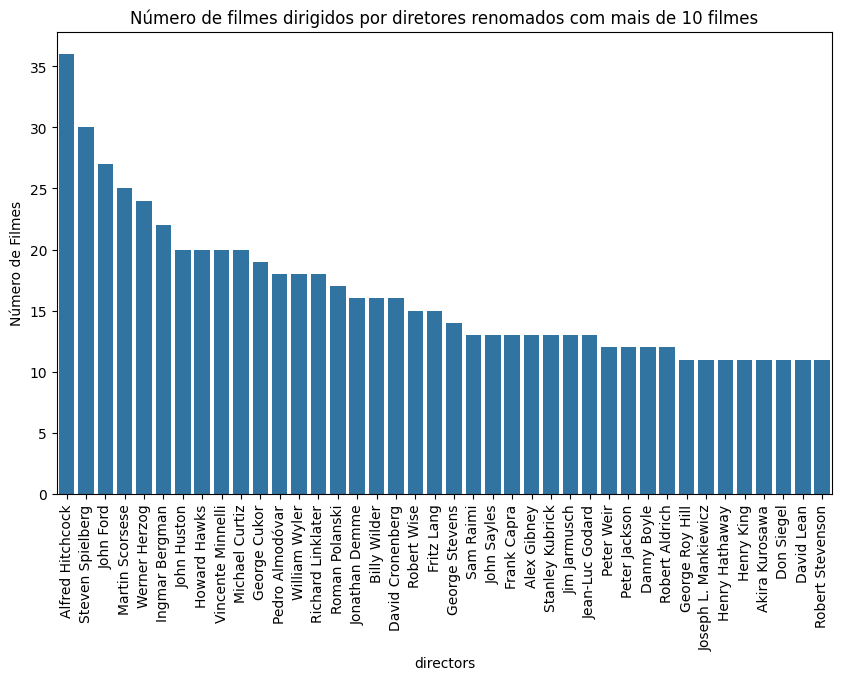

In [68]:
# Contar o número de filmes por diretor renomado
director_film_count = df_renowned_directors['directors'].value_counts()

# Filtrar diretores com mais de 10 filmes
directors_with_more_than_10_films = director_film_count[director_film_count > 10]

# Plotar a quantidade de filmes por diretores renomados com mais de 10 filmes
plt.figure(figsize=(10, 6))
sns.barplot(x=directors_with_more_than_10_films.index, y=directors_with_more_than_10_films.values)
plt.xticks(rotation=90)
plt.title('Número de filmes dirigidos por diretores renomados com mais de 10 filmes')
plt.ylabel('Número de Filmes')
plt.show()


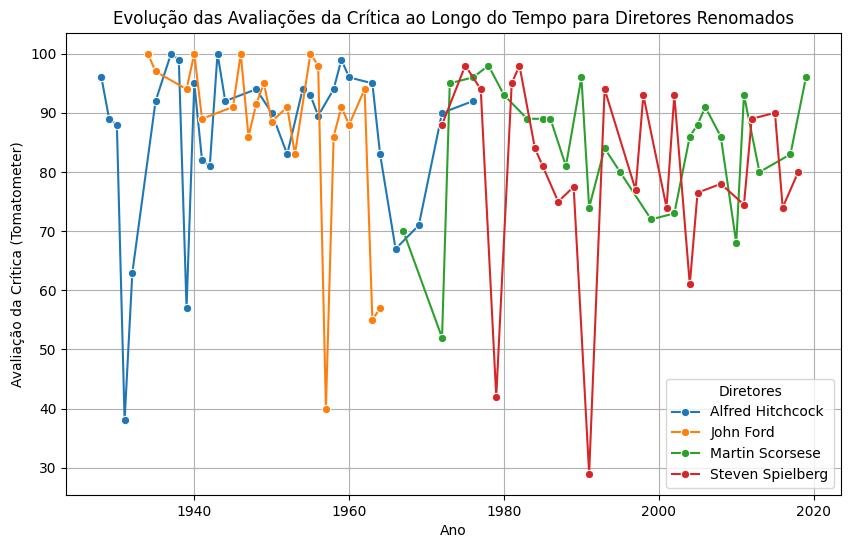

In [70]:
# Agrupar por diretores e ano de lançamento para calcular a média da avaliação da crítica ao longo do tempo
df_renowned_directors['year'] = df_renowned_directors['original_release_date'].dt.year
director_ratings_by_year = df_renowned_directors.groupby(['directors', 'year'])['tomatometer_rating'].mean().reset_index()

# Selecionar alguns diretores renomados para visualizar a evolução das notas da crítica ao longo dos anos
selected_directors = ['Alfred Hitchcock', 'Steven Spielberg', 'Martin Scorsese', 'John Ford']

# Filtrar os dados para esses diretores
director_ratings_sample = director_ratings_by_year[director_ratings_by_year['directors'].isin(selected_directors)]

# Plotar a evolução das avaliações da crítica ao longo dos anos
plt.figure(figsize=(10, 6))
sns.lineplot(data=director_ratings_sample, x='year', y='tomatometer_rating', hue='directors', marker='o')

plt.title('Evolução das Avaliações da Crítica ao Longo do Tempo para Diretores Renomados')
plt.xlabel('Ano')
plt.ylabel('Avaliação da Crítica (Tomatometer)')
plt.legend(title='Diretores')
plt.grid(True)
plt.show()


## 1. Há uma relação significativa entre as notas da crítica e as notas do público para filmes de diretores renomados?

In [19]:
# Calcular a correlação entre as notas da crítica e do público
correlation = df_renowned_directors[['tomatometer_rating', 'audience_rating']].corr()

# Regressão linear entre as notas da crítica e do público
X = df_renowned_directors[['audience_rating']]
y = df_renowned_directors['tomatometer_rating']

regression_model = LinearRegression()
regression_model.fit(X, y)

r_squared = regression_model.score(X, y)

correlation, r_squared

(                    tomatometer_rating  audience_rating
 tomatometer_rating            1.000000         0.598782
 audience_rating               0.598782         1.000000,
 0.3585393300871609)

### **A correlação entre as notas da crítica (Tomatometer) e as notas do público para filmes de diretores renomados, conforme o output fornecido, é de 0,5988. Isso indica uma correlação moderada entre as duas variáveis. Ou seja, há uma tendência de que filmes com boas avaliações da crítica também recebam boas avaliações do público, mas essa relação não é extremamente forte.**

### **O valor de 0,3585 refere-se ao coeficiente de determinação (R²), que significa que aproximadamente 35,85% da variação nas notas do público pode ser explicada pelas notas da crítica. Isso sugere que, embora exista uma relação significativa, outros fatores também influenciam as avaliações do público de forma substancial.**

## 2. Os filmes dirigidos por diretores renomados têm melhores bilheterias em média do que filmes de outros diretores?

In [20]:
# Comparar bilheteria de filmes de diretores renomados
all_movies_audience_count = df_clean['audience_count'].mean()
renowned_directors_audience_count = df_renowned_directors['audience_count'].mean()

all_movies_audience_count, renowned_directors_audience_count


(151593.36697700227, 293505.4047093451)

### **Há uma relação significativa entre filmes dirigidos por diretores renomados e não renomados, os filmes digiridos por diretores renomados chegam quase ao dobro de bilheteria média**

## 3. Os gêneros mais explorados por diretores renomados têm impacto em suas avaliações?

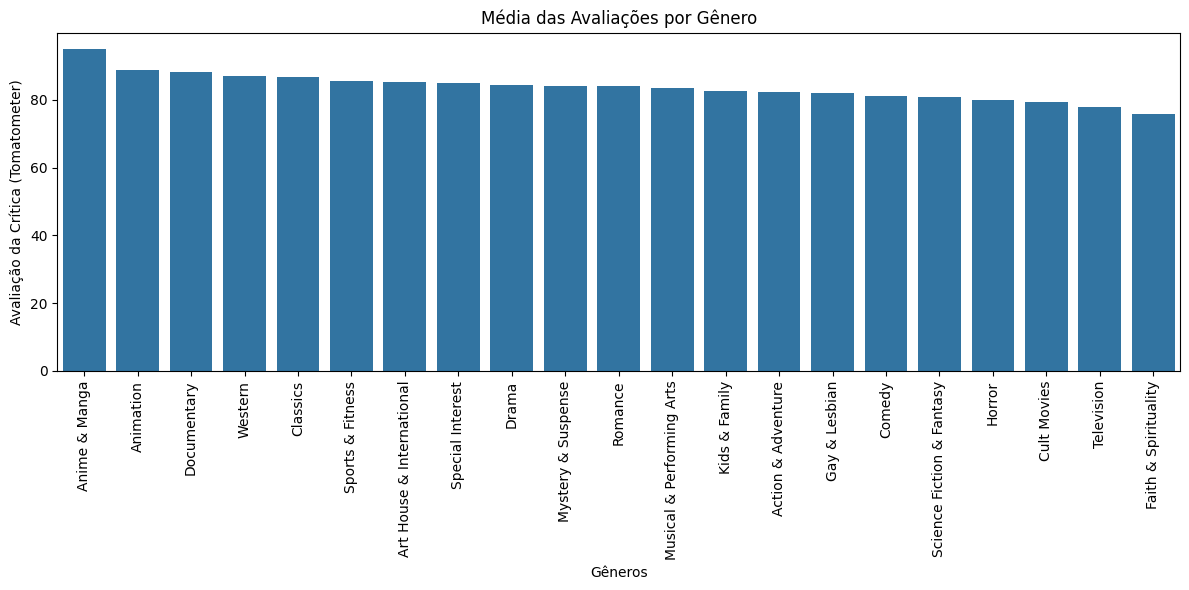

In [30]:
# Criar gráfico de média das avaliações por gênero para diretores renomados
df_renowned_directors['genres'] = df_renowned_directors['genres'].str.split(', ')
df_exploded = df_renowned_directors.explode('genres')

# Agrupar por gênero e calcular a média das avaliações
genres_ratings = df_exploded.groupby('genres')['tomatometer_rating'].mean().reset_index()

# Plotar as médias por gênero
plt.figure(figsize=(12, 6))
sns.barplot(data=genres_ratings, x='genres', y='tomatometer_rating', order=genres_ratings.sort_values('tomatometer_rating', ascending=False)['genres'])
plt.title('Média das Avaliações por Gênero')
plt.xlabel('Gêneros')
plt.ylabel('Avaliação da Crítica (Tomatometer)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### **Observando o gráfico é notavel que o impacto não é relevante**

## 4. Os diretores renomados produzem filmes com maior duração média?

In [38]:
# Comparar a duração média dos filmes de diretores renomados e não renomados
all_movies_runtime = df_clean['runtime'].mean()
renowned_directors_runtime = df_renowned_directors['runtime'].mean()

print('Duração média de todos os filmes:', all_movies_runtime)
print('Duração média dos filmes de diretores renomados:', renowned_directors_runtime)


Duração média de todos os filmes: 102.74059799838379
Duração média dos filmes de diretores renomados: 112.8880706921944


### **Ao observar esses dados é possível notar que os filmes feitos por diretores renomados não é significativamente maiores**

## 5. Ao longo das decácas as notas caíram?

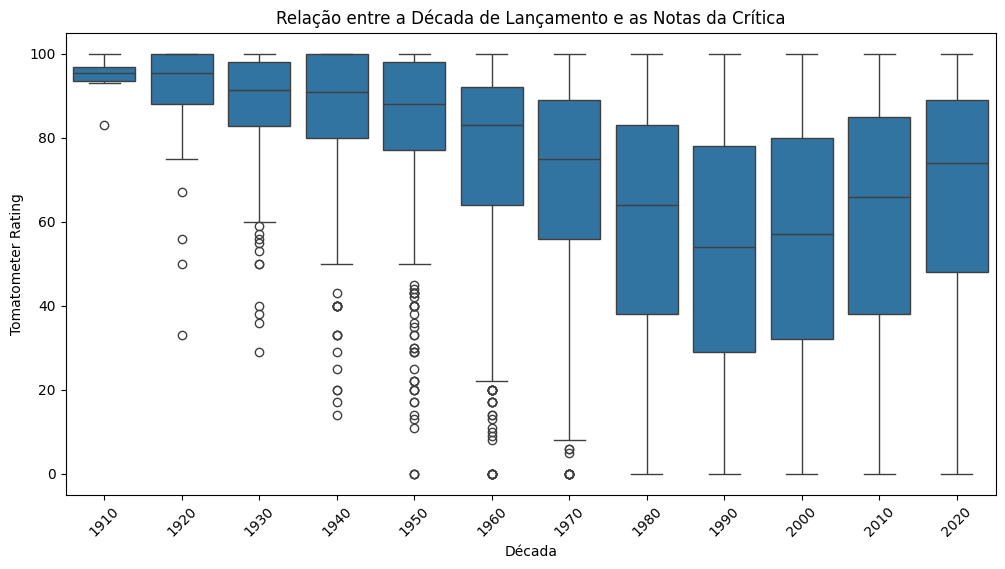

In [61]:
# Adicionar coluna de ano ao DataFrame
df_renowned_directors['release_year'] = df_renowned_directors['original_release_date'].dt.year

# Criar uma coluna de década
df_renowned_directors['decade'] = (df_renowned_directors['release_year'] // 10 * 10)

# Analisar a relação entre a década e a nota da crítica usando boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='decade', y='tomatometer_rating')
plt.title('Relação entre a Década de Lançamento e as Notas da Crítica')
plt.xlabel('Década')
plt.ylabel('Tomatometer Rating')
plt.xticks(rotation=45)  # Rotaciona os rótulos das décadas para melhor visualização
plt.show()


### **Ao observar os boxplots podemos notar que as notas dos diretores renomados caíram até a década de 90 e voltaram a crescer a partir dos anos 2000**

## 6. Comparando por produtora, qual público gera maior nota, a crítica ou o público?

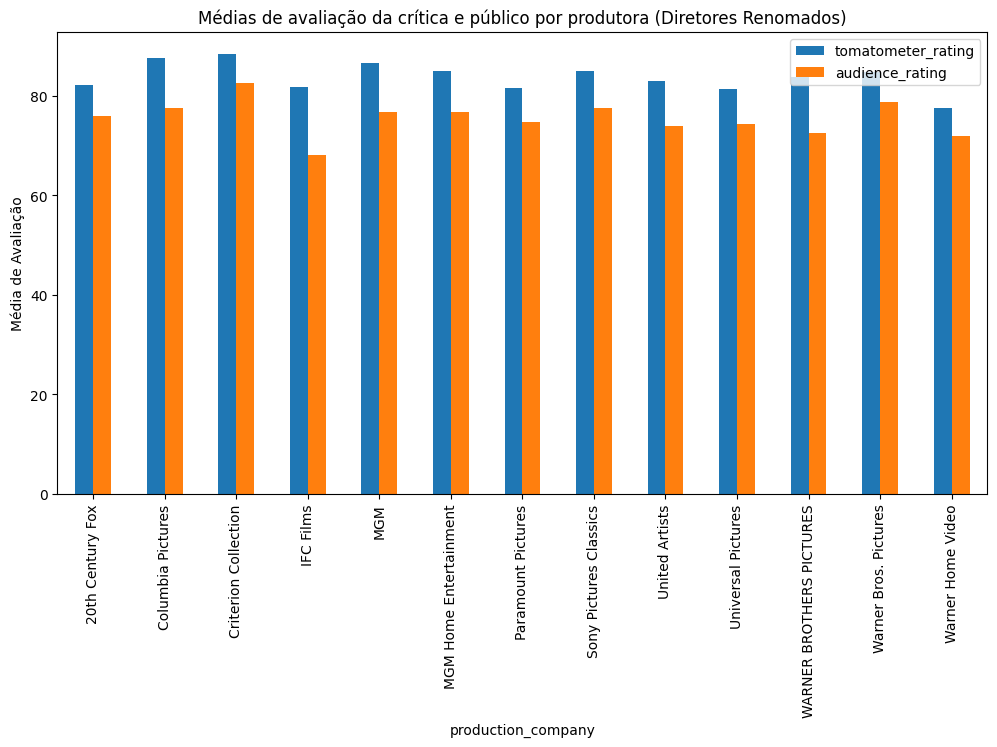

In [66]:
# Filtrar produtoras com mais de 5 filmes de diretores renomados
production_count = df_renowned_directors['production_company'].value_counts()
major_productions = production_count[production_count > 20].index

# Filtrar o dataset para as principais produtoras
df_major_productions = df_renowned_directors[df_renowned_directors['production_company'].isin(major_productions)]

# Calcular a média das avaliações da crítica e público por produtora
production_avg_ratings = df_major_productions.groupby('production_company')[['tomatometer_rating', 'audience_rating']].mean()

# Plotar as médias das avaliações da crítica e público por produtora
production_avg_ratings.plot(kind='bar', figsize=(12, 6), title='Médias de avaliação da crítica e público por produtora (Diretores Renomados)')
plt.ylabel('Média de Avaliação')
plt.show()


### **A nota da crítica em todos os casos foi maior**

## 7. Quais os diretores renomados com mais filmes produzidos?

Text(0, 0.5, 'Avaliação da Crítica (Tomatometer)')

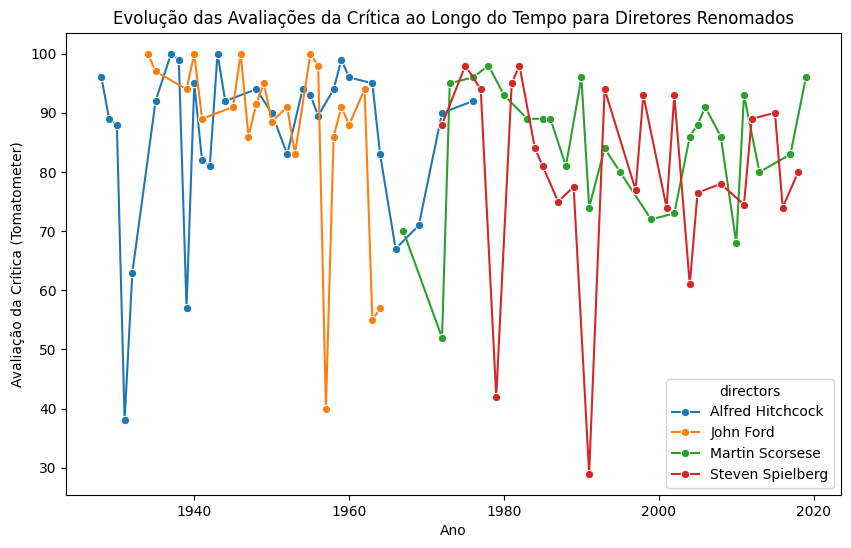

In [75]:
# Agrupar por diretores e ano de lançamento para calcular a média da avaliação da crítica ao longo do tempo
df_renowned_directors['year'] = df_renowned_directors['original_release_date'].dt.year
director_ratings_by_year = df_renowned_directors.groupby(['directors', 'year'])['tomatometer_rating'].mean().reset_index()

# Selecionar alguns diretores renomados para visualizar a evolução das notas da crítica ao longo dos anos
selected_directors = ['Alfred Hitchcock', 'Steven Spielberg', 'Martin Scorsese', 'John Ford']

# Filtrar os dados para esses diretores
director_ratings_sample = director_ratings_by_year[director_ratings_by_year['directors'].isin(selected_directors)]

# Plotar a evolução das avaliações da crítica ao longo dos anos
plt.figure(figsize=(10, 6))
sns.lineplot(data=director_ratings_sample, x='year', y='tomatometer_rating', hue='directors', marker='o')

plt.title('Evolução das Avaliações da Crítica ao Longo do Tempo para Diretores Renomados')
plt.xlabel('Ano')
plt.ylabel('Avaliação da Crítica (Tomatometer)')

### **Ao longo dos anos esses 4 grandes diretores houveram quedas significativas de notas, apesar de seus grandes títulos**

## 8. Os diretores Alfred Hitchcock, Steven Spielberg, Martin Scorsese e John Ford têm consistentemente boas notas da crítica ao longo do tempo?

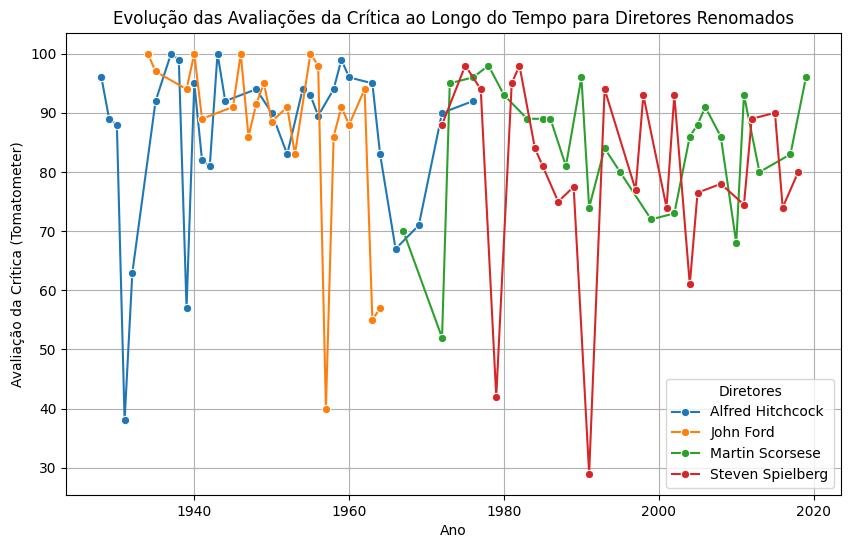

In [77]:
# Agrupar por diretores e ano de lançamento para calcular a média da avaliação da crítica ao longo do tempo
df_renowned_directors['year'] = df_renowned_directors['original_release_date'].dt.year
director_ratings_by_year = df_renowned_directors.groupby(['directors', 'year'])['tomatometer_rating'].mean().reset_index()

# Selecionar alguns diretores renomados para visualizar a evolução das notas da crítica ao longo dos anos
selected_directors = ['Alfred Hitchcock', 'Steven Spielberg', 'Martin Scorsese', 'John Ford']

# Filtrar os dados para esses diretores
director_ratings_sample = director_ratings_by_year[director_ratings_by_year['directors'].isin(selected_directors)]

# Plotar a evolução das avaliações da crítica ao longo dos anos
plt.figure(figsize=(10, 6))
sns.lineplot(data=director_ratings_sample, x='year', y='tomatometer_rating', hue='directors', marker='o')

plt.title('Evolução das Avaliações da Crítica ao Longo do Tempo para Diretores Renomados')
plt.xlabel('Ano')
plt.ylabel('Avaliação da Crítica (Tomatometer)')
plt.legend(title='Diretores')
plt.grid(True)
plt.show()

### **Nenhum dos diretores teve uma trajetória completamente estável com notas consistentemente altas, mas diretores como Alfred Hitchcock e John Ford mantiveram avaliações mais elevadas e constantes durante longos períodos de suas carreiras. Scorsese e Spielberg tiveram maiores flutuações em suas notas da crítica.**

## 9. Qual é a média de duração dos filmes dirigidos por Alfred Hitchcock, Steven Spielberg, Martin Scorsese e John Ford?


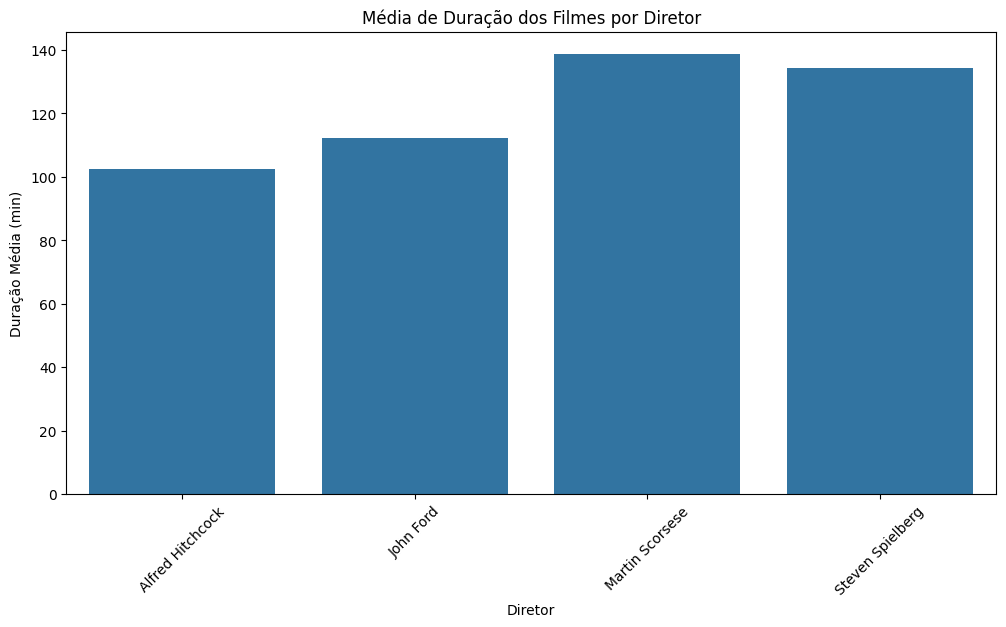

          directors     runtime
0  Alfred Hitchcock  102.361111
1         John Ford  112.185185
2   Martin Scorsese  138.680000
3  Steven Spielberg  134.366667


In [73]:
# Filtrar filmes dirigidos pelos quatro diretores
directors_of_interest = ['Alfred Hitchcock', 'Steven Spielberg', 'Martin Scorsese', 'John Ford']
df_directors = df_clean[df_clean['directors'].isin(directors_of_interest)]

# Calcular a duração média dos filmes para cada diretor
average_runtime = df_directors.groupby('directors')['runtime'].mean().reset_index()

# Plotar a média de duração dos filmes para os diretores de interesse
plt.figure(figsize=(12, 6))
sns.barplot(data=average_runtime, x='directors', y='runtime')
plt.title('Média de Duração dos Filmes por Diretor')
plt.xlabel('Diretor')
plt.ylabel('Duração Média (min)')
plt.xticks(rotation=45)
plt.show()

# Exibir os resultados
print(average_runtime)


### **A média de duração dos filmes dirigidos pelos quatro diretores, conforme o gráfico fornecido, é a seguinte:**

### - Alfred Hitchcock: 102,36 minutos
### - John Ford: 112,19 minutos
### - Martin Scorsese: 138,68 minutos
### - Steven Spielberg: 134,37 minutos

## 10. Quais os generos mais utilizados dos filmes dirigidos por Alfred Hitchcock, Steven Spielberg, Martin Scorsese e John Ford?

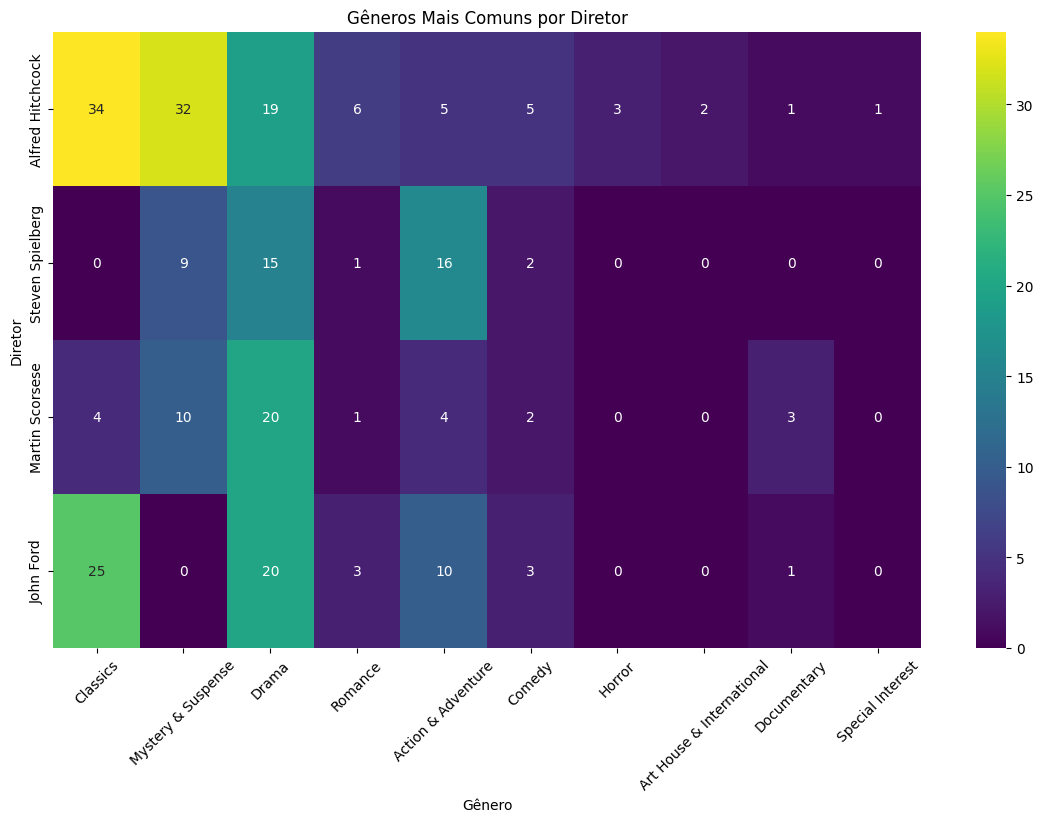

                  Classics  Mystery & Suspense  Drama  Romance  \
Alfred Hitchcock        34                  32     19        6   
Steven Spielberg         0                   9     15        1   
Martin Scorsese          4                  10     20        1   
John Ford               25                   0     20        3   

                  Action & Adventure  Comedy  Horror  \
Alfred Hitchcock                   5       5       3   
Steven Spielberg                  16       2       0   
Martin Scorsese                    4       2       0   
John Ford                         10       3       0   

                  Art House & International  Documentary  Special Interest  
Alfred Hitchcock                          2            1                 1  
Steven Spielberg                          0            0                 0  
Martin Scorsese                           0            3                 0  
John Ford                                 0            1                 0  


In [74]:
# Filtrar filmes dirigidos pelos quatro diretores
directors_of_interest = ['Alfred Hitchcock', 'Steven Spielberg', 'Martin Scorsese', 'John Ford']
df_directors = df_clean[df_clean['directors'].isin(directors_of_interest)]

# Separar e contar gêneros para cada diretor
def get_genre_counts(df, director):
    # Filtrar os filmes do diretor
    df_director = df[df['directors'] == director]

    # Separar gêneros e contar a frequência
    genres = df_director['genres'].str.split(', ', expand=True).stack()
    genre_counts = genres.value_counts()

    return genre_counts

# Criar um DataFrame para armazenar os resultados
genre_counts_df = pd.DataFrame()

# Obter e armazenar contagens de gêneros para cada diretor
for director in directors_of_interest:
    genre_counts = get_genre_counts(df_directors, director)
    genre_counts_df[director] = genre_counts

# Transpor o DataFrame para facilitar a visualização
genre_counts_df = genre_counts_df.fillna(0).T
genre_counts_df = genre_counts_df.astype(int)

# Plotar os gêneros mais comuns para cada diretor
plt.figure(figsize=(14, 8))
sns.heatmap(genre_counts_df, cmap='viridis', annot=True, fmt='d', cbar=True)
plt.title('Gêneros Mais Comuns por Diretor')
plt.xlabel('Gênero')
plt.ylabel('Diretor')
plt.xticks(rotation=45)
plt.show()

# Exibir os resultados
print(genre_counts_df)

### **Cada diretor tem uma ênfase em gêneros específicos. Alfred Hitchcock é fortemente associado a Mystery & Suspense, enquanto Steven Spielberg é conhecido por seus filmes de Action & Adventure. Martin Scorsese se destaca em Drama, assim como John Ford, que também tem uma forte presença no gênero Classics.**

## Conclusão

Os diretores renomados, apesar de suas diferenças em estilo, duração dos filmes e gênero, compartilham o sucesso comercial e o reconhecimento da crítica. A relação entre as notas da crítica e do público é moderada, e fatores como bilheteria, reputação e gênero desempenham papéis importantes, mas não determinantes, na avaliação dos filmes. Ao longo do tempo, esses diretores têm mostrado que, mesmo com flutuações nas avaliações, produziram grandes títulos durante toda a carreira.